<a href="https://colab.research.google.com/github/SlabberP/Machine-Learning-Practice-Solutions/blob/main/Car_Insurance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Car Insurance Data
   Author: **Pieter Slabber**

##Part1:

Dataset information required:

1. Source of data

  https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

2. Brief description of data

  The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.

  Content The columns are resembling practical world features. The outcome column indicates 1 if a customer has claimed his/her loan else 0. The data has 19 features from there 18 of them are corresponding logs which were taken by the company.

3. What is the target?

  The target is the 'Outcome' column which is a binary classification answer.

4. What does one row represent? (A person? A business? An event? A product?)

  This is business data

5. Is this a classification or regression problem?

   This is a classification problem. The outcome column indicates 1 if a customer has claimed his/her loan else 0.

6. How many features does the data have?

   The data consists of 19 features.

7. How many rows are in the dataset?

   The dataset consists of 10000 rows.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

   I need to decide to remove some of the features and also Which inconsistencies exists. This could be a challenging dataset but it is close to a real world example as one can get.

##Part2:

1. Deleted unnecessary columns.

2. Deleted duplicate rows.

3. Identified and addressed missing values.

4. Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

5. Produced univariate visuals for the target and all features.

6. Identified outliers.

7. Clearly commented all of your cleaning steps and described any decisions you made.

Commit your file to your Github repository and submit the link below.

##Part3:

1.  For this part of the project, you will continue your data exploration by:
  1.   Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
  2.   Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends.

1.  **Then, choose two visualizations from your analysis** that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience **(Neither of these should be histograms, boxplots, or correlation plots)**.
  1.   These plots should be so simple and so easy to read that a 6th grader could understand them in less than 10 seconds without asking questions. They don't need to be fancy; they need to CLEARLY show an interesting trend or correlation between features in your data.

### **Import Libraries**

In [2]:
# Import Pandas
import pandas as pd
# Import Numpy
import numpy as np
#Import seaborn
import seaborn as sns
#Import Matplotlib
import matplotlib.pyplot as plt


### **Mount Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load the Dataset**

In [4]:
# load data
path = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week09/Data/Car_Insurance_Claim.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


### **Delete unnecessary columns**

In [5]:
## Drop collumns
df = df.drop(columns=['ID','POSTAL_CODE'])
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


*   Remove ID column because it will not make difference whether a person will claim or not.
*   The POSTAL_CODE column will also not make a difference.




### **Check for duplicates**

In [6]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 20 duplicate rows.


There are 20 Duplicate rows

In [7]:
## Drop duplicate rows
df.drop_duplicates(inplace=True)

Remove the duplicates with the code above and check again with the code below.
The print must show 0 duplicates.

In [8]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Identified and addressed missing values**

In [9]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 1914 missing values.


In [10]:
# Let's investigate the rows with missing information
# Method 1:
df.loc[df.isna().any(axis=1)]

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
13,16-25,female,majority,0-9y,university,upper class,0.591260,1.0,before 2015,0.0,1.0,NaN,sedan,0,0,0,0.0
15,26-39,female,majority,0-9y,high school,upper class,0.762798,0.0,after 2015,1.0,0.0,NaN,sedan,0,0,0,0.0
16,65+,male,majority,30y+,university,upper class,0.796175,1.0,before 2015,1.0,1.0,NaN,sedan,10,2,1,0.0
17,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,1.0,0.0,12000.0,sedan,0,0,0,1.0
18,26-39,female,majority,0-9y,university,upper class,0.680594,1.0,before 2015,0.0,1.0,NaN,sedan,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,65+,male,minority,0-9y,none,upper class,0.710640,1.0,after 2015,0.0,1.0,NaN,sedan,0,0,0,0.0
9981,26-39,male,majority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
9985,16-25,male,minority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
9988,26-39,male,majority,10-19y,high school,poverty,NaN,0.0,before 2015,0.0,0.0,NaN,sedan,1,0,2,1.0


One can see from the table above that so far 2 columns contain null values. To double check we run the code below to confirm our finding.

In [11]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           962
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         952
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

There are 2 columns with null values. It will be addressed with the section below.

In [12]:
# Inspect the Fare column's value counts
value_counts = df['CREDIT_SCORE'].value_counts()
print(value_counts)

0.629027    1
0.618094    1
0.396540    1
0.578306    1
0.633275    1
           ..
0.309272    1
0.847325    1
0.432080    1
0.527041    1
0.435225    1
Name: CREDIT_SCORE, Length: 9018, dtype: int64


In [13]:
# Calculate the mean of the CREDIT_SCORE column
mean_value = df['CREDIT_SCORE'].mean()
mean_value

0.515812809602791

Calculate the mean value and replace all missing values in the CREDIT_SCORE column with this value which is done in the code cell below.

In [14]:
# Replace null values with the mean value
df['CREDIT_SCORE'].fillna(mean_value, inplace=True)

In [15]:
# Inspect the Fare column's value counts
value_counts = df['ANNUAL_MILEAGE'].value_counts()
print(value_counts)

11000.0    1252
12000.0    1217
13000.0    1134
10000.0    1071
14000.0     890
9000.0      854
15000.0     630
8000.0      557
16000.0     418
7000.0      322
17000.0     245
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: ANNUAL_MILEAGE, dtype: int64


In [16]:
# Calculate the mean of the ANNUAL_MILEAGE column
mean_value2 = df['ANNUAL_MILEAGE'].mean()
mean_value2

11694.395214887018

Calculate the mean value and replace all missing values in the ANNUAL_MILEAGE column with this value which is done in the code cell below.

In [17]:
# Replace null values with the mean value
df['ANNUAL_MILEAGE'].fillna(mean_value, inplace=True)

Double check the missing values to ensure none exist

In [18]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

No Missing values were found

### **Identified and corrected inconsistencies in data for categorical values**

In [19]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

Identify the Categorical columns and display the different values

In [20]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= AGE
26-39    3061
40-64    2930
16-25    1999
65+      1990
Name: AGE, dtype: int64



- Column= GENDER
female    4998
male      4982
Name: GENDER, dtype: int64



- Column= RACE
majority    8992
minority     988
Name: RACE, dtype: int64



- Column= DRIVING_EXPERIENCE
0-9y      3513
10-19y    3297
20-29y    2118
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64



- Column= EDUCATION
high school    4148
university     3925
none           1907
Name: EDUCATION, dtype: int64



- Column= INCOME
upper class      4334
middle class     2137
poverty          1798
working class    1711
Name: INCOME, dtype: int64



- Column= VEHICLE_YEAR
before 2015    6948
after 2015     3032
Name: VEHICLE_YEAR, dtype: int64



- Column= VEHICLE_TYPE
sedan         9503
sports car     477
Name: VEHICLE_TYPE, dtype: int64





No inconsistencies found in the Categorical columns

###**Produce univariate visuals for the target and all features**

Text(0.5, 1.0, '# AGE')

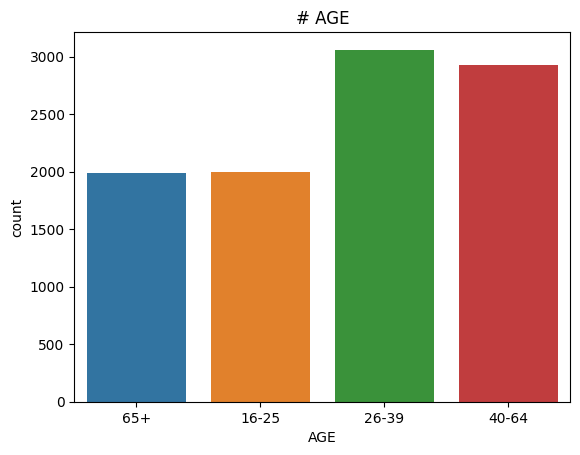

In [21]:
# Check univariate distributions and explore categorical variable(s)
import seaborn as sns
ax = sns.countplot(x=df['AGE'])
ax.set_title('# AGE')

Text(0.5, 1.0, '# GENDER')

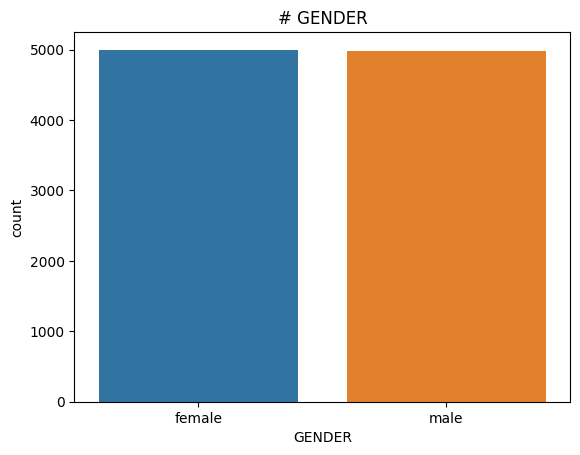

In [22]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['GENDER'])
ax.set_title('# GENDER')

Text(0.5, 1.0, '# GENDER')

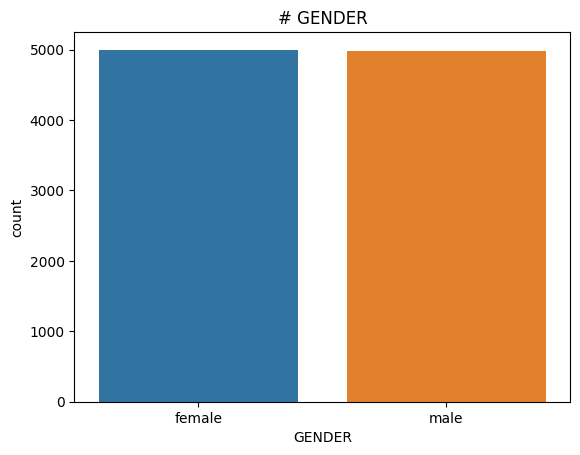

In [23]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['GENDER'])
ax.set_title('# GENDER')

Text(0.5, 1.0, '# RACE')

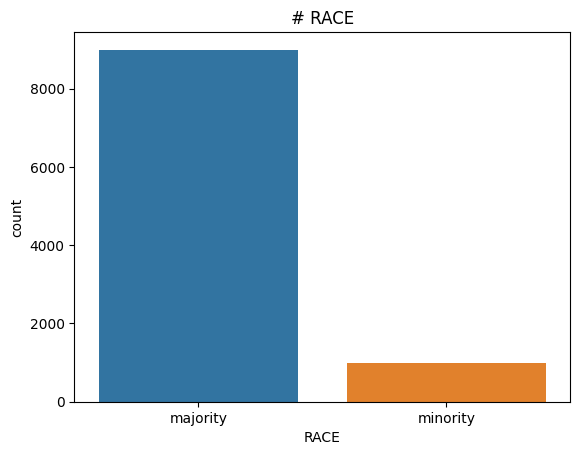

In [24]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['RACE'])
ax.set_title('# RACE')

Text(0.5, 1.0, '# DRIVING_EXPERIENCE')

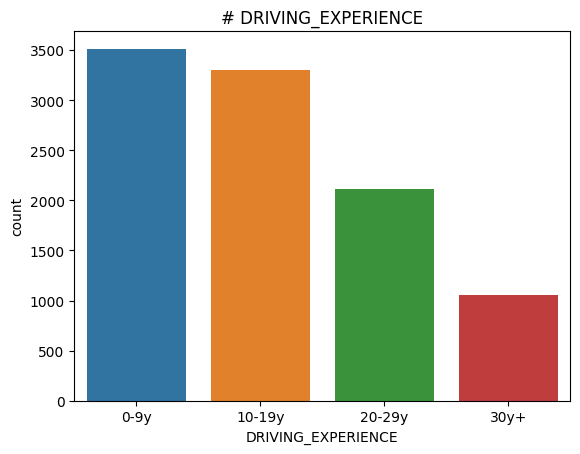

In [25]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['DRIVING_EXPERIENCE'])
ax.set_title('# DRIVING_EXPERIENCE')

Text(0.5, 1.0, '# EDUCATION')

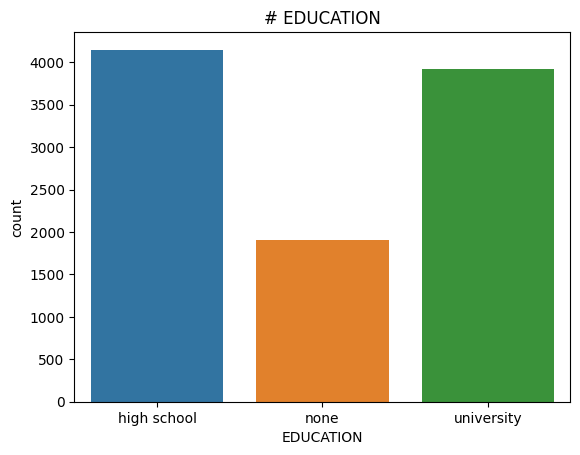

In [26]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['EDUCATION'])
ax.set_title('# EDUCATION')

Text(0.5, 1.0, '# RACE')

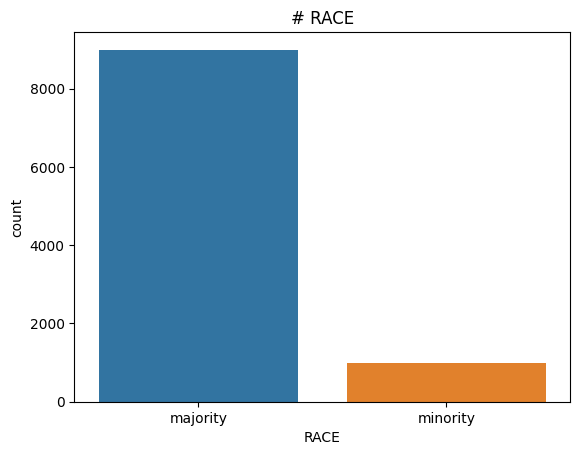

In [27]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['RACE'])
ax.set_title('# RACE')

Text(0.5, 1.0, '# INCOME')

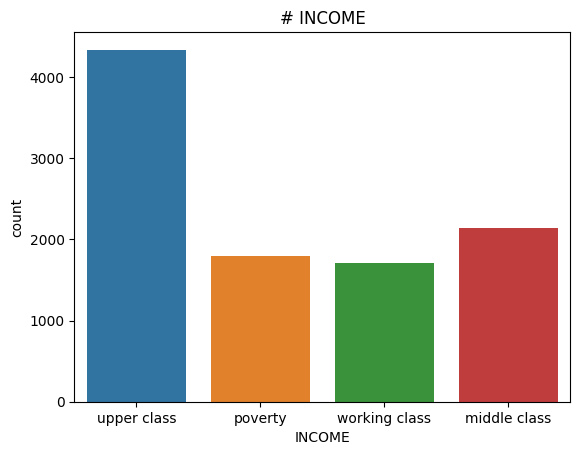

In [28]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['INCOME'])
ax.set_title('# INCOME')

Text(0.5, 1.0, '# CREDIT_SCORE')

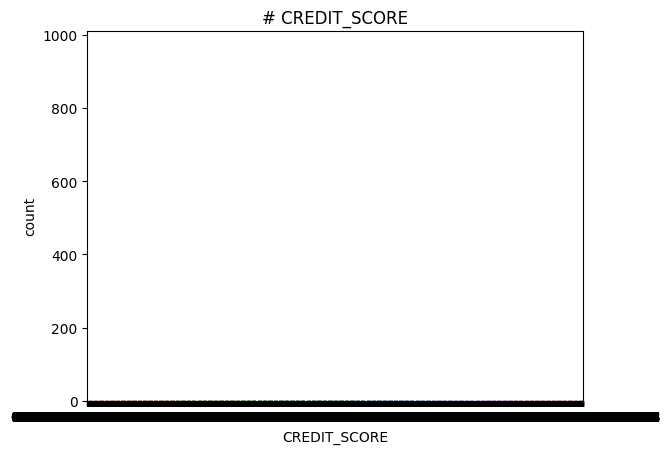

In [29]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['CREDIT_SCORE'])
ax.set_title('# CREDIT_SCORE')

It has too many different Values to display.

Text(0.5, 1.0, '# VEHICLE_OWNERSHIP')

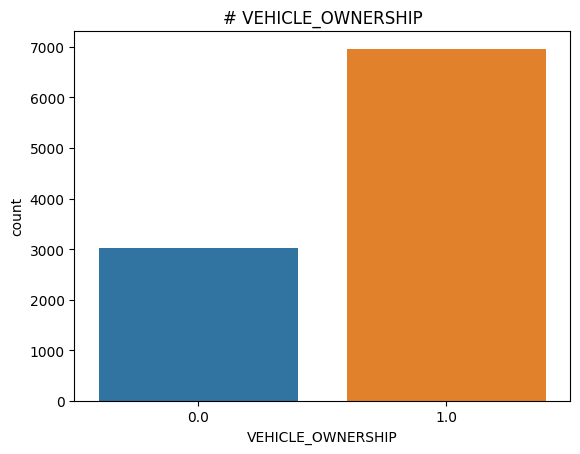

In [30]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['VEHICLE_OWNERSHIP'])
ax.set_title('# VEHICLE_OWNERSHIP')

Text(0.5, 1.0, '# VEHICLE_YEAR')

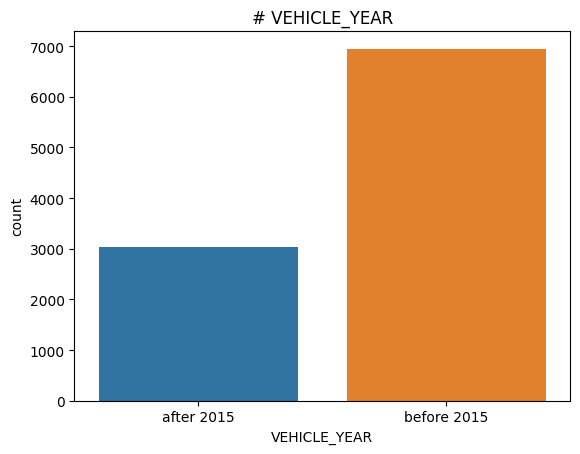

In [31]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['VEHICLE_YEAR'])
ax.set_title('# VEHICLE_YEAR')

Text(0.5, 1.0, '# MARRIED')

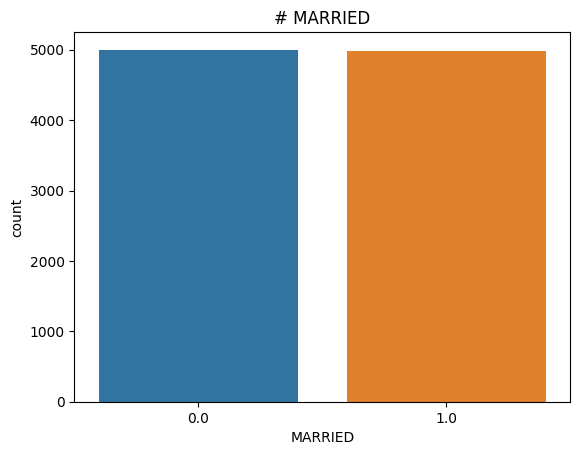

In [32]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['MARRIED'])
ax.set_title('# MARRIED')

Text(0.5, 1.0, '# CHILDREN')

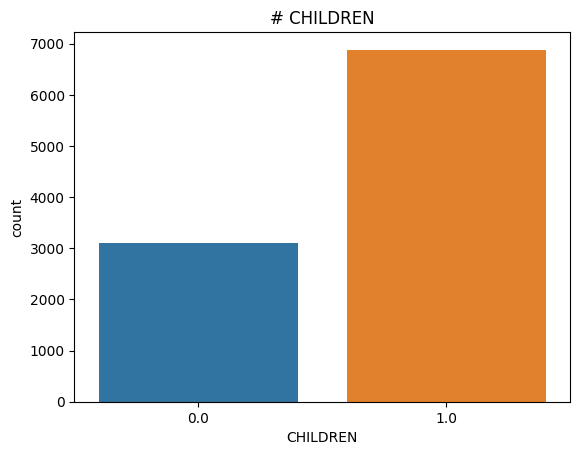

In [33]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['CHILDREN'])
ax.set_title('# CHILDREN')

Text(0.5, 1.0, '# ANNUAL_MILEAGE')

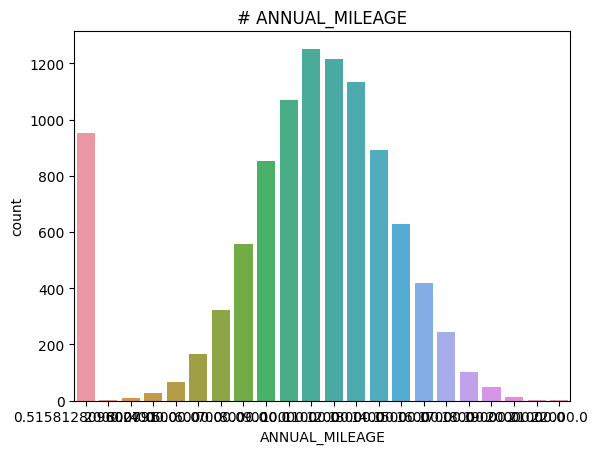

In [34]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['ANNUAL_MILEAGE'])
ax.set_title('# ANNUAL_MILEAGE')

Text(0.5, 1.0, '# VEHICLE_TYPE')

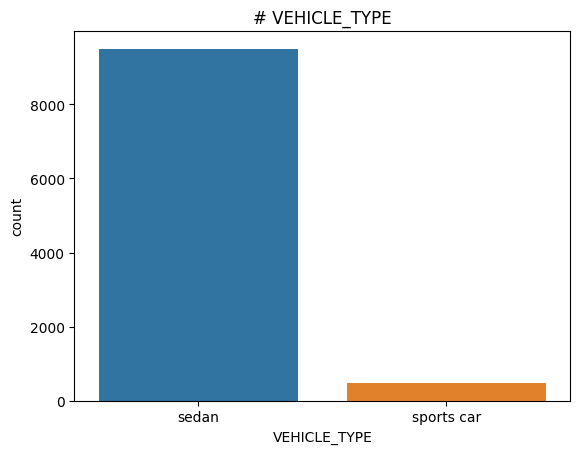

In [35]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['VEHICLE_TYPE'])
ax.set_title('# VEHICLE_TYPE')

Text(0.5, 1.0, '# SPEEDING_VIOLATIONS')

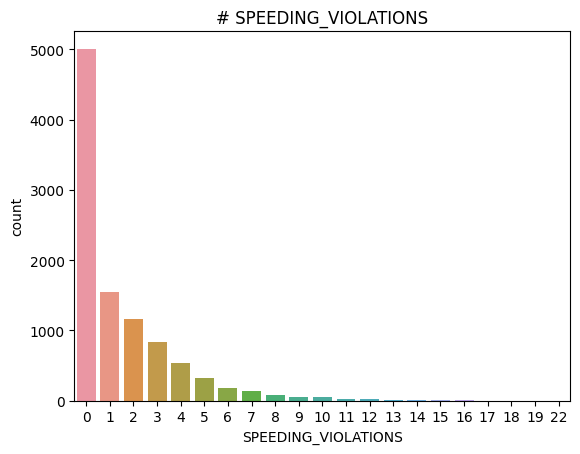

In [36]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['SPEEDING_VIOLATIONS'])
ax.set_title('# SPEEDING_VIOLATIONS')

Text(0.5, 1.0, '# DUIS')

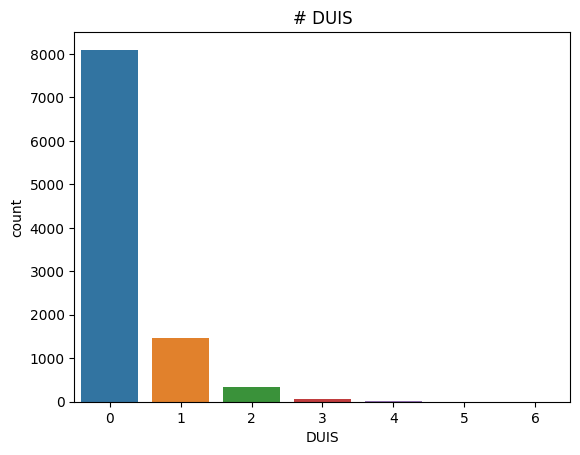

In [37]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['DUIS'])
ax.set_title('# DUIS')

Text(0.5, 1.0, '# PAST_ACCIDENTS')

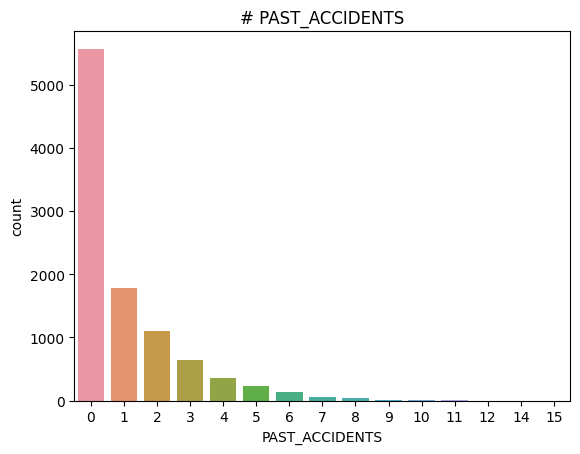

In [38]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['PAST_ACCIDENTS'])
ax.set_title('# PAST_ACCIDENTS')

**TARGET**

Text(0.5, 1.0, '# OUTCOME')

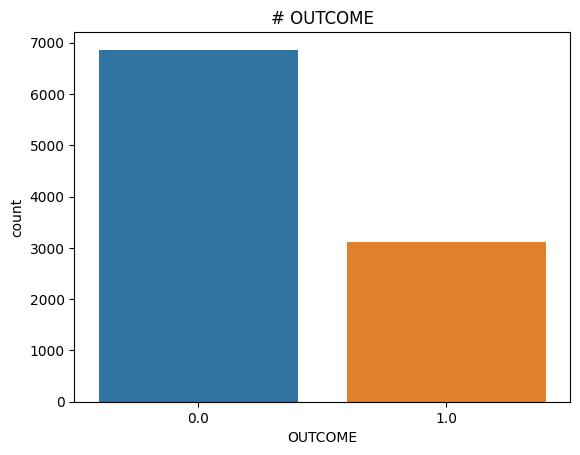

In [39]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['OUTCOME'])
ax.set_title('# OUTCOME')

In [40]:
## Identify Outliers
df.describe(include="object")

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,9980,9980,9980,9980,9980,9980,9980,9980
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3061,4998,8992,3513,4148,4334,6948,9503


No Outliers could be identified.

###**Produce multiivariate visuals**

HeatMap:

<ipython-input-41-2a8f11d63906>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


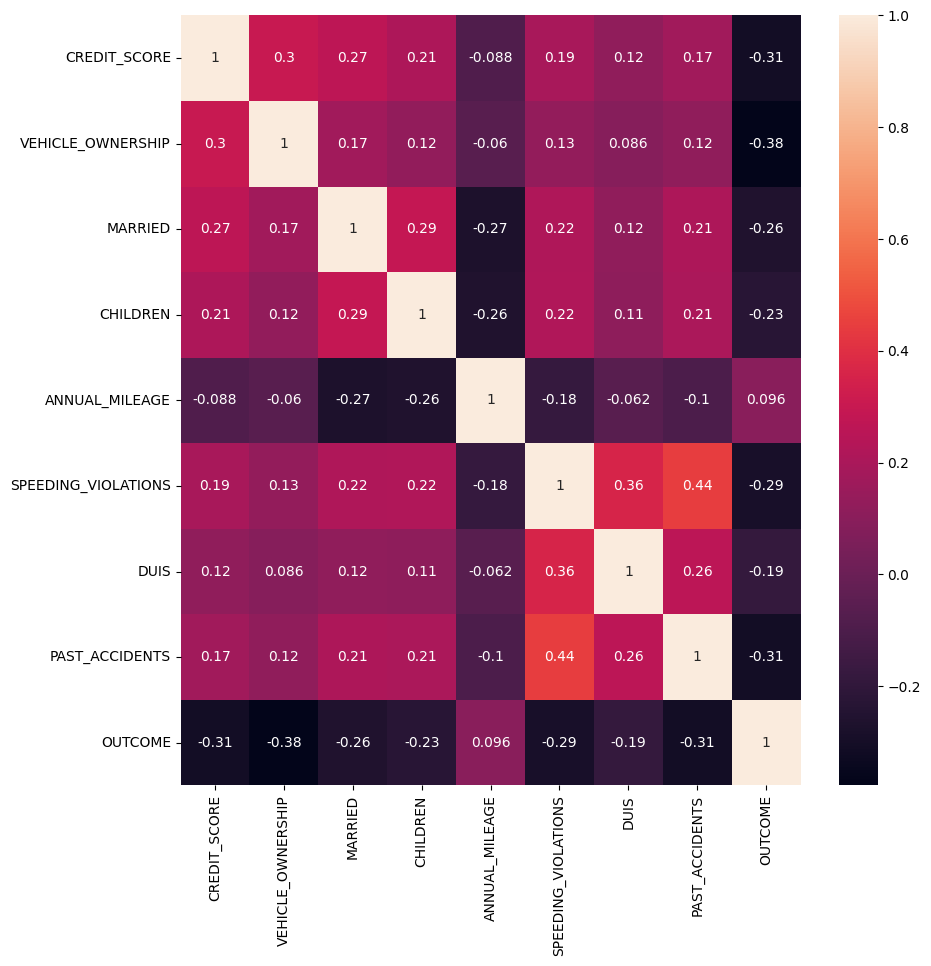

In [41]:
# Explore the relationships between variables with bivariate visuals

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True);

The lighter the heatmap colour is, the higher the correlation is. In other words, the closer to 1.0 the higher the correlation.


I can see there is a high correlation between PAST_ACCIDENTS and SPEEDING_VIOLATIONS which makes perfect sense.

I can also see a correlation between PAST_ACCIDENTS and DUIS which also makes a lot of sense.

I can also see a correlation between MARRIED and VEHICLE_OWNERSHIP which also makes sense.

A humorous correlation is between SPEEDING_VIOLATION and CHILDREN.

I can also see a correlation between VEHICLE_OWNERSHIP and CREDIT_SCORE which also makes sense.

Unfortunately it is difficult to find any correlation between the feautures and the target(OUTCOME) looking at the heatmap.

Text(0.5, 1.0, 'Multivariate Bar Plot')

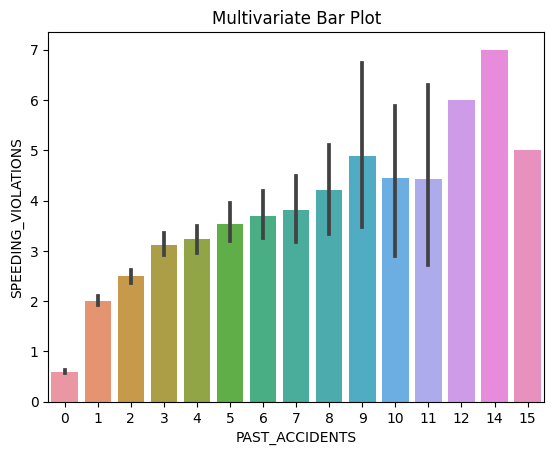

In [42]:
# Making a seaborn barplot as a starting point
ax = sns.barplot(data=df, x='PAST_ACCIDENTS', y='SPEEDING_VIOLATIONS')

# Add labels and a title
plt.xlabel("PAST_ACCIDENTS")
plt.ylabel("SPEEDING_VIOLATIONS")
plt.title("Multivariate Bar Plot")

Text(0.5, 1.0, 'Multivariate Bar Plot')

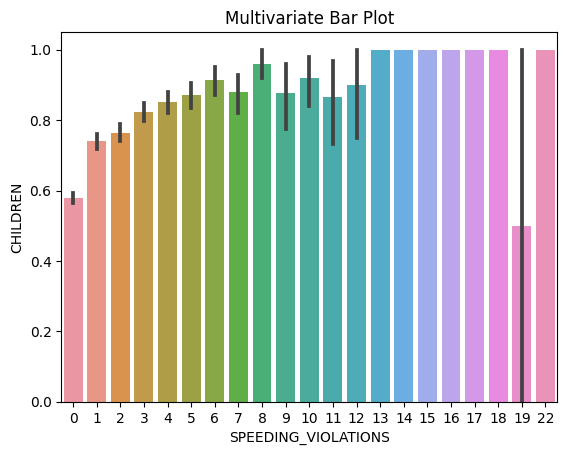

In [43]:
# Making a seaborn barplot as a starting point
ax = sns.barplot(data=df, x='SPEEDING_VIOLATIONS', y='CHILDREN')

# Add labels and a title
plt.xlabel("SPEEDING_VIOLATIONS")
plt.ylabel("CHILDREN")
plt.title("Multivariate Bar Plot")

Text(0.5, 1.0, 'Multivariate Stripplot')

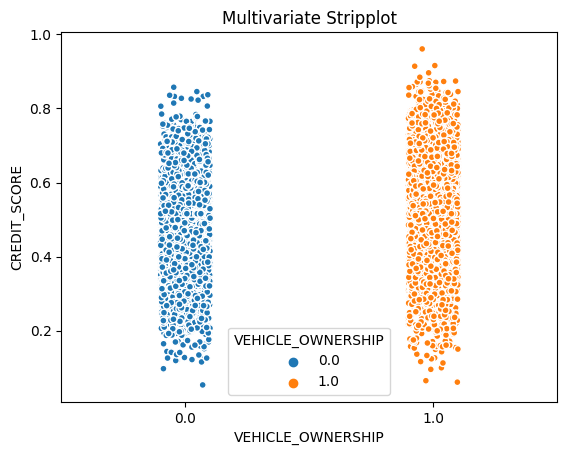

In [44]:
# Stripplot takes the same arguments as barplot
ax = sns.stripplot(data=df, x='VEHICLE_OWNERSHIP', y='CREDIT_SCORE',
                   hue='VEHICLE_OWNERSHIP',edgecolor='white', linewidth=1)
plt.title("Multivariate Stripplot")

Text(0.5, 1.0, 'Multivariate Reggression Plot')

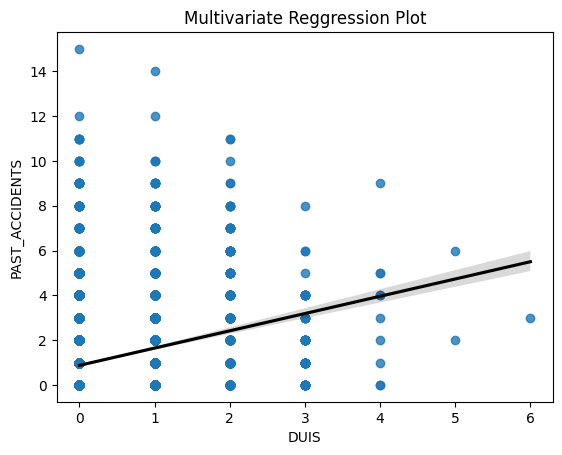

In [51]:
## Saving the arguments for the line color in a dict to to use as line_kws
line_kws = dict(color='black')
ax = sns.regplot(data=df, x="DUIS", y="PAST_ACCIDENTS",
                 line_kws=line_kws)
plt.title("Multivariate Reggression Plot")

#ax = sns.regplot(data=df, x="SPEEDING_VIOLATIONS", y="CHILDREN");


Text(0.5, 1.0, 'Multivariate Bar Plot')

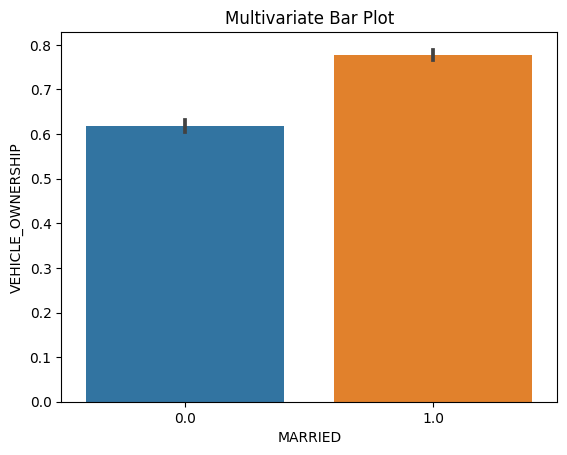

In [46]:
# Making a seaborn barplot as a starting point
ax = sns.barplot(data=df, x='MARRIED', y='VEHICLE_OWNERSHIP')

# Add labels and a title
plt.xlabel("MARRIED")
plt.ylabel("VEHICLE_OWNERSHIP")
plt.title("Multivariate Bar Plot")


###Visualizations between the Target and some of the features of interest.

Text(0.5, 1.0, 'Multivariate Bar Plot')

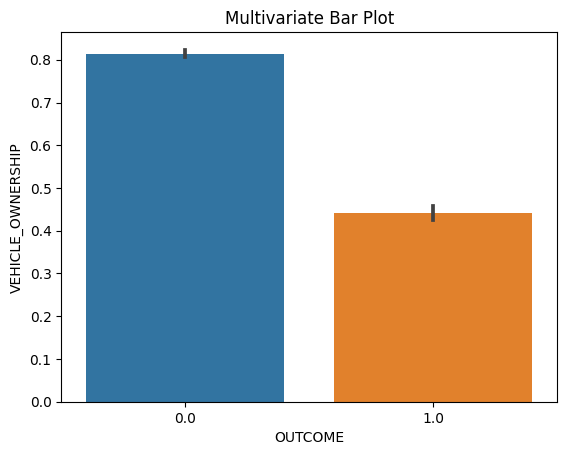

In [47]:
# Making a seaborn barplot as a starting point
ax = sns.barplot(data=df, x='OUTCOME', y='VEHICLE_OWNERSHIP')

# Add labels and a title
plt.xlabel("OUTCOME")
plt.ylabel("VEHICLE_OWNERSHIP")
plt.title("Multivariate Bar Plot")

Text(0.5, 1.0, 'Multivariate Stripplot')

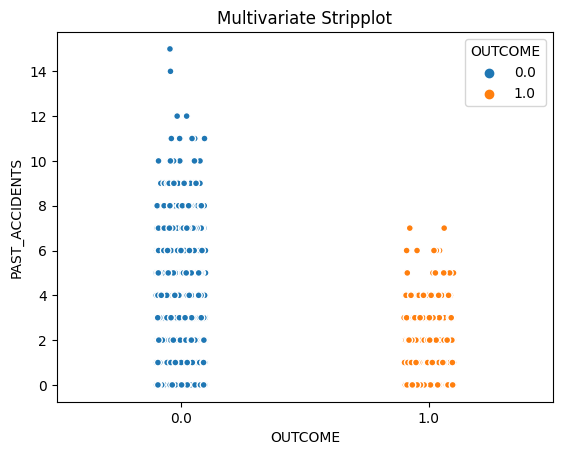

In [48]:
# Stripplot takes the same arguments as barplot
ax = sns.stripplot(data=df, x='OUTCOME', y='PAST_ACCIDENTS',
                   hue='OUTCOME',edgecolor='white', linewidth=1)
plt.title("Multivariate Stripplot")

###Two Visualizations from the analysis that demonstrates key trends i think will be of interest to the stakeholder.

Text(0.5, 1.0, 'Multivariate Reggression Plot')

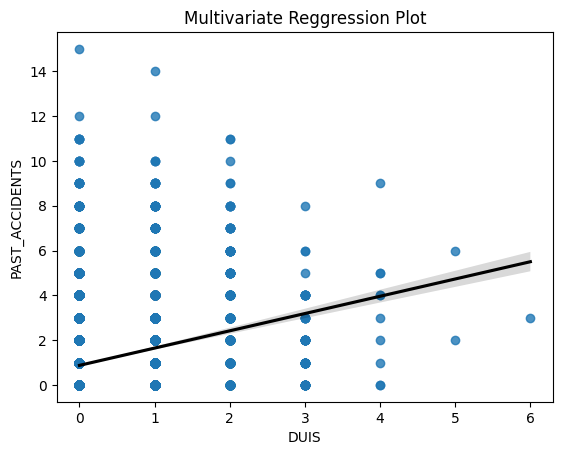

In [52]:
## Saving the arguments for the line color in a dict to to use as line_kws
line_kws = dict(color='black')
ax = sns.regplot(data=df, x="DUIS", y="PAST_ACCIDENTS",
                 line_kws=line_kws)
plt.title("Multivariate Reggression Plot")

#ax = sns.regplot(data=df, x="SPEEDING_VIOLATIONS", y="CHILDREN");


If you look at the above graph one can clearly see that the more people that drive underthe influence(DUIS), the more accidents are caused by them which is very clear in relationship between the two columns and the black regression line. In reality it makes sense when people drive under the influence of alcohol or drugs that the chances to make an accident is bigger that if the drive sober. This will obviously cause more claims by die driver and these people are a risk for the Car Insurance company.

Text(0.5, 1.0, 'Multivariate Bar Plot')

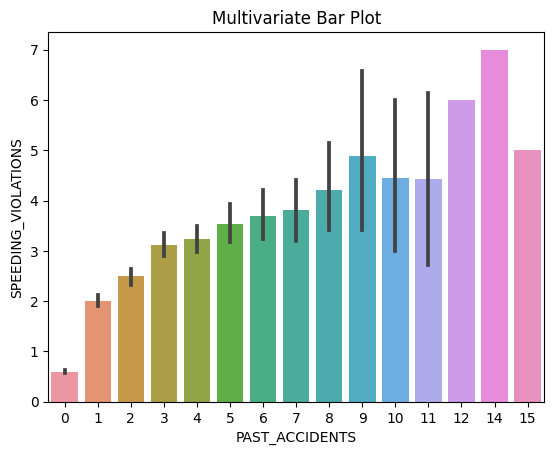

In [50]:
# Making a seaborn barplot as a starting point
ax = sns.barplot(data=df, x='PAST_ACCIDENTS', y='SPEEDING_VIOLATIONS')

# Add labels and a title
plt.xlabel("PAST_ACCIDENTS")
plt.ylabel("SPEEDING_VIOLATIONS")
plt.title("Multivariate Bar Plot")

One can also clearly see that the PAST_ACCIDENTS goes up with more SPEEDING_VIOLATIONS. The more a driver is speeding and get a fine the higher chances are that the accidents will occur and therefor the claims will also increase. These people are risks for the Car insurance company.